#  Business Problem

    . Develop a predictive model to identify wheather mushroom is good or poisonous based on various features of mushrooms
    . A general guideline for features, people should look out for when picking mushrooms
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\subha\Downloads\mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# 

  . this dataset consists of 8124 records with 23 features(22 input & 1 output)
  
  
  . 22 input features (all 22 are discrete categorical).

In [4]:
df['class'].unique()

array(['p', 'e'], dtype=object)

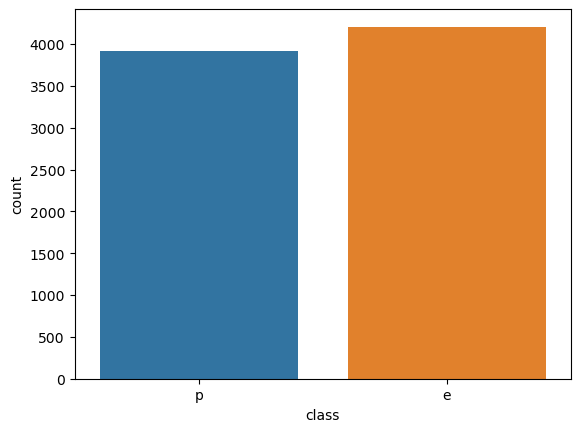

In [5]:
sns.countplot(data=df,x='class')
plt.show()

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [11]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [12]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

####  x & y

In [13]:
x = pd.get_dummies(df.drop('class',axis=1),drop_first=True)
y = df["class"]

####  Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

#####  Identifying best parameter for adaboost model using Hyperparameter Tuning

In [15]:
from sklearn.model_selection import GridSearchCV

# model/estimator
from sklearn.ensemble import AdaBoostClassifier
estimator_ab = AdaBoostClassifier()

# parameter grid
param_grid_ab = {"n_estimators":list(range(1,51))}

# grid search
grid_ab = GridSearchCV(estimator_ab,param_grid_ab,cv=5,scoring='accuracy')
grid_ab.fit(x_train,y_train)

# best parameters for Adaboost Model
grid_ab.best_params_

{'n_estimators': 20}

In [16]:
feats_ab = pd.DataFrame(data=grid_ab.best_estimator_.feature_importances_,
                       index=x.columns,
                       columns=["Feature_Importance"])

feats1 = feats_ab[feats_ab["Feature_Importance"]>0]
list1 = feats1.index.to_list()

#####  AdaBoost Model important features


In [17]:
feats_ab = pd.DataFrame(data=grid_ab.best_estimator_.feature_importances_,
                       index=x.columns,
                       columns=["Importance"])

feats1 = feats_ab[feats_ab["Importance"]>0]
imp_features_list_ab = feats_ab[feats_ab['Importance']>0].index.to_list()

#####  Ada Boost Classifier with its important features& best hyperparameter

In [18]:
x_imp = x[imp_features_list_ab]     #  Dropped unimportant

x_train_ab,x_test_ab,y_train_ab,y_test_ab = train_test_split(x_imp,y,test_size=0.2,random_state=101)
# Modelling
ada = AdaBoostClassifier(n_estimators=20)
ada.fit(x_train_ab,y_train_ab)

# Evaluaation
ypred_train_ab = ada.predict(x_train_ab)

from sklearn.metrics import accuracy_score
print("Train Accuracy:",accuracy_score(y_train_ab,ypred_train_ab))

# Cross Validation
from sklearn.model_selection import cross_val_score
print("Cross Validation Score:",cross_val_score(ada,x_train_ab,y_train_ab,cv=5).mean())

# Evaluation of Test Data
ypred_test_ab = ada.predict(x_test_ab)
print("Test accuracy:",accuracy_score(y_test_ab,ypred_test_ab))

Train Accuracy: 1.0
Cross Validation Score: 1.0
Test accuracy: 1.0


#####  Identify Best Parameter for Gradient Boost model using Hyperparameter Tuning


In [19]:
from sklearn.model_selection import GridSearchCV

# Model/Estimator
from sklearn.ensemble import GradientBoostingClassifier
estimator_gb = GradientBoostingClassifier()
 
# prameters grid
param_grid = {"n_estimators":[1,5,10,20],
             "learning_rate":[0.1,0.2,0.3,0.5,0.8,1]}

# grid Search
grid_gb = GridSearchCV(estimator_gb, param_grid,cv=5,scoring='accuracy')
grid_gb.fit(x_train,y_train)

# Best parameter for gradientBood=st Model
grid_gb.best_params_

{'learning_rate': 0.8, 'n_estimators': 10}

####  Gradient Boost Model importante features


In [ ]:
feats_gb = pd.DataFrame(index = x.columns,
                       data   = grid_gb.best_estimator_.feature_importances_,
                       columns = ['Importance'])
important_features_gb = feats_gb[feats_gb['Importance']>0.01]
imp_features_list_gb = feats_gb[feats_gb['Importance']>0.01].index.to_list()

#### Gradient Boost With importance features &best hypoparameters

In [ ]:
x_imp = x[imp_features_list_gb]    # dropped unimportant

x_train_gb, x_test_gb, y_train_gb, y_test_gb = train_test_split(x_imp,y,test_size=0.2,random_state=101)

# Modelling
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=10,learning_rate=0.8)
gb.fit(x_train_gb,y_train_gb)

# Evaluation
ypred_train = gb.predict(x_train_gb)
print("Train accuracy:",accuracy_score(y_train_gb,ypred_train))

# Cross Validation
from sklearn.model_selection import cross_val_score
print("Cross Validation Score:",cross_val_score(gb,x_train_gb,y_train_gb,cv=5).mean())

# Evaluation of test data
ypred_test = gb.predict(x_test_gb)
print("Test accuracy:",accuracy_score(y_test_gb,ypred_test))

####  Identifying the best parameters for Xtreme Gradient Boost(XGB) model using hyperparameter Tuning

In [ ]:
# Installation XGBoost using jupyter notebook
!pip install xgboost

In [ ]:
y = pd.get_dummies(df["class"],drop_first=True)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Model/Evaluation
from xgboost import XGBClassifier
estimator_xgb = XGBClassifier()

# Parameters grid
param_grid = {"n_estimators":[10,20,40,100],
             'max_depth':[3,4,5],
             'gamma':[0,0.15,0.3,0.5,1]}
# grid search
grid_xgb = GridSearchCV(estimator_xgb,param_grid,cv=5,scoring='accuracy')
grid_xgb.fit(x_train,y_train)

# Best parameter for XGB model
grid_xgb.best_params_


####  XGB Model important features

In [ ]:
feats_xgb = pd.DataFrame(data=grid_xgb.best_estimator_.feature_importances_,
                        index=x.columns,
                        columns=['Importance'])
important_features_xgb = feats_xgb[feats_xgb['Importance']>0.01]

imp_features_list_xgb = feats_xgb[feats_xgb['Importance']>0.01].index.to_list()

###  Xtreme GradientBoost with important features & best hyperparameters

In [ ]:
x_imp_xgb = x[imp_features_list_xgb]       # dropped unimportant

x_train_xgb,x_test_xgb,y_train_xgb,y_test_xgb = train_test_split(x_imp_xgb,y,test_size=0.2,random_state=101)

# MOdelling
xgb = XGBClassifier(gamma=0,max_depth=3,n_estimators=40)
xgb.fit(x_train_xgb,y_train_xgb)

# Evaluation
ypred_train = xgb.predict(x_train_xgb)
print("Train Accuracy:",accuracy_score(y_train_xgb,ypred_train))

# Cross Validation
print("Cross_Validation Score:",cross_val_score(xgb,x_train_xgb,y_train_xgb,cv=5).mean())

# Evaluation of test data
ypred_test = xgb.predict(x_test_xgb)
print("Test Accuracy:",accuracy_score(y_test_xgb,ypred_test))

##  Final Model

In [ ]:
ada = AdaBoostClassifier(n_estimators=20)
plt.figure(figsize=(14,6),dpi=200)

sns.barplot(data=important_features_xgb.sort_values('Importance'),
           x=important_features_xgb.index,
           y='Importance')
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_ab,ypred_test_ab)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_ab,ypred_test_ab))